In [17]:
import numpy as np

In [22]:
def create_matrix(n: int):
    M = np.zeros((n,n))
    for i in range(n):
        M[i][i] = -2
        if (i+1 <n):
            M[i][i+1] = 1
        if (i>0):
            M[i][i-1] = 1
    return M

In [30]:
def sum_rows (M, j):
    res = 0
    for i in range(M.shape[0]):
        res += abs(M.item(i, j))
    return res
def sum_cols(M, j):
    res = 0
    for i in range(M.shape[1]):
        res += abs(M.item(j, i))
    return res
def get_eig (M):
    eigs, _ = np.linalg.eig(M)
    return eigs

In [31]:
def norm_rows(M):
    set = [sum_cols(M,i) for i in range(M.shape[1])]
    return max(set)
def norm_cols(M):
    set = [sum_rows(M,i) for i in range(M.shape[0])]
    return max(set)
def norm_eig(M):
    return max(abs(get_eig(M)))**0.5

In [25]:
import matplotlib.pyplot as plt

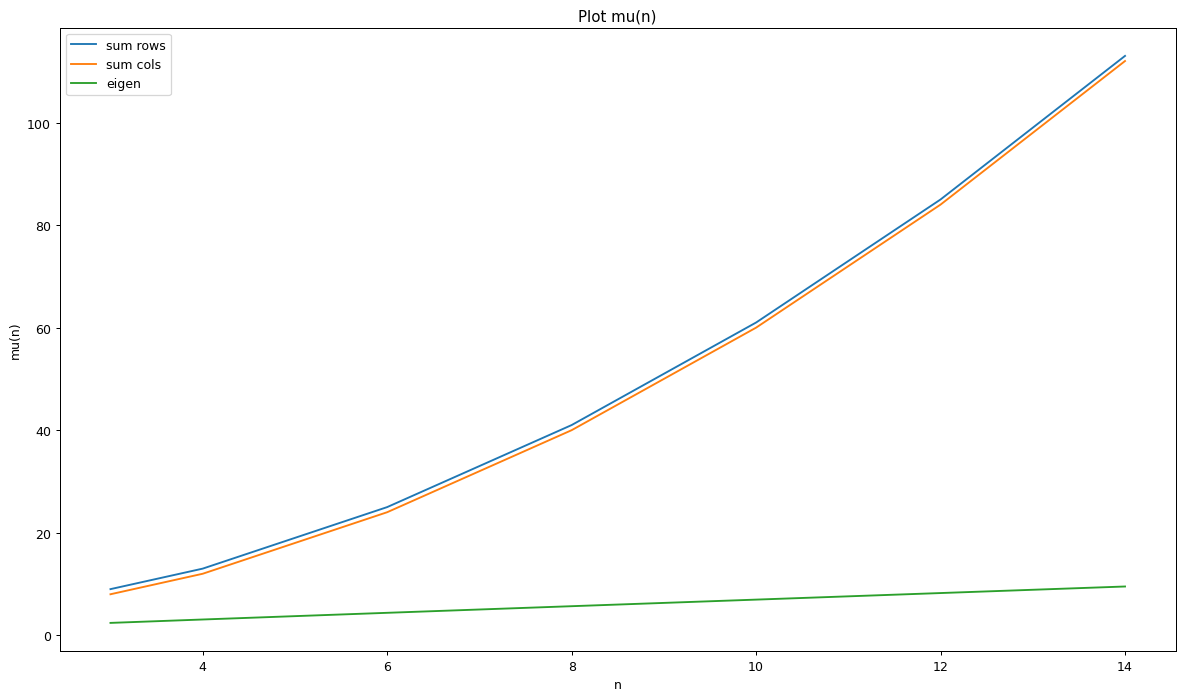

In [40]:
max_n = 15
ns = np.arange(3, max_n)
mus_rows = [] 
mus_cols = []
mus_eig = []
for n in ns:
    M = create_matrix(n)
    MInv = np.linalg.inv(M)

    mus_rows.append(norm_rows(M)*norm_rows(MInv) +1)
    mus_cols.append(norm_cols(M) * norm_cols(MInv))
    mus_eig.append(norm_eig(M)*norm_eig(MInv))
plt.figure(figsize=(16,9), dpi=90)
plt.title("Plot mu(n)")
plt.xlabel("n")
plt.ylabel("mu(n)")
plt.plot(ns, mus_rows, label="sum rows")
plt.plot(ns, mus_cols, label="sum cols")
plt.plot(ns, mus_eig, label="eigen")
plt.legend()
plt.show()